In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, classification_report, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):

    if cmap is None:
      cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim(len(target_names)-0.5, -0.5)
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.savefig(title + '.png', dpi=500, bbox_inches = 'tight')
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 17)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


---
# Data Analysis and Preprocessing

Checking for duplicated data

In [ ]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


Based on results above, there are no duplicates in the dataset


-------------------
Checking for null entries in datatset

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Percentage of missing data in each attribute

In [ ]:
round(df[df.columns[df.isnull().any()].tolist()].isnull().sum()/len(df)*100,2)

education     2.57
cigsPerDay    0.65
BPMeds        1.30
totChol       1.12
BMI           0.41
heartRate     0.03
glucose       8.97
dtype: float64

Plot above data as a bar graph

<Axes: >

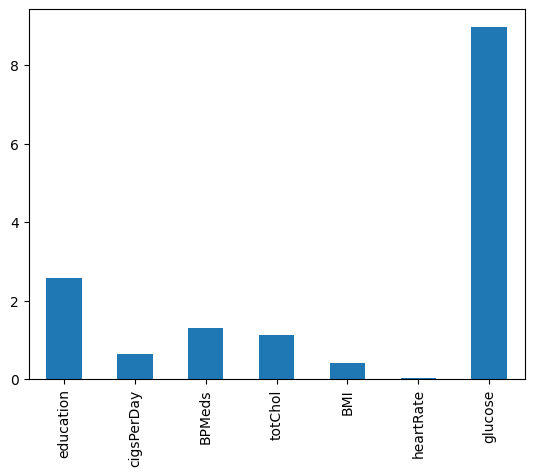

In [ ]:
round(df[df.columns[df.isnull().any()].tolist()].isnull().sum()/len(df)*100,2).plot(kind='bar')

The representative age group of the dataset

Text(0.5, 1.0, 'Age Distrubution')

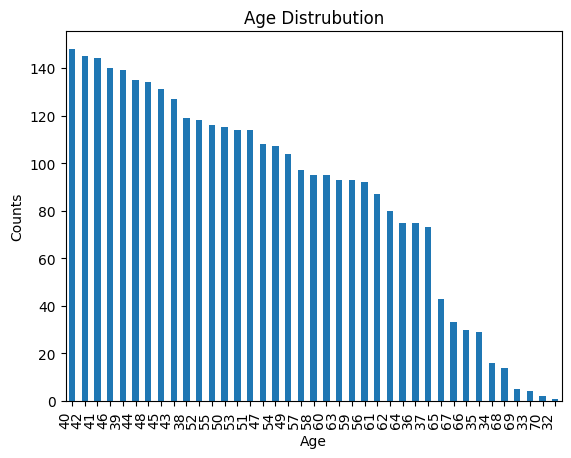

In [ ]:
df['age'].value_counts().plot.bar()
plt.xlabel('Age')
plt.ylabel('Counts')
plt.xticks(horizontalalignment='right')
plt.title('Age Distrubution')

Based on results, the main represtation is in the range of 36-60

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'cigsPerDay'}>],
       [<Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>, <Axes: >]], dtype=object)

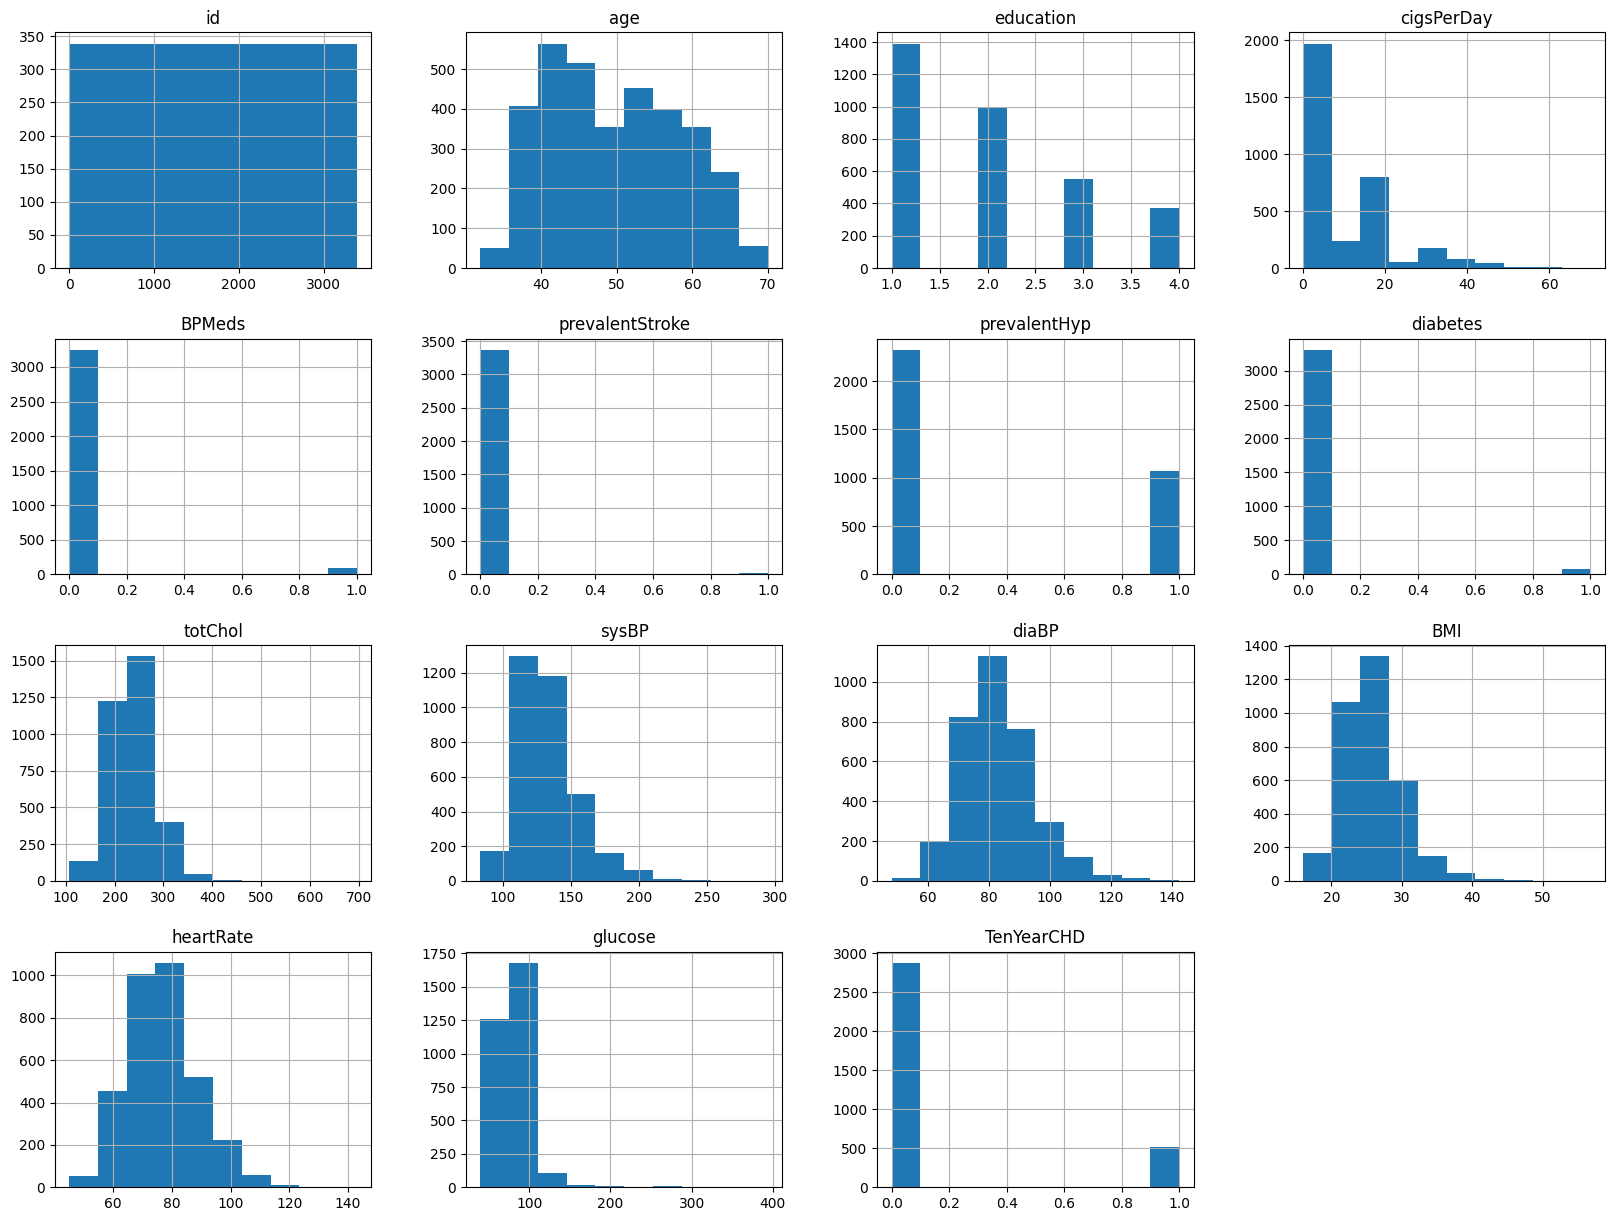

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax = ax)

ID will be removed since it will not be useful to the training model

In [ ]:
df.drop(['id'],axis=1,inplace=True)

'sex' and 'is_smoking' are nominal attributes
thus, nominal encoding, one-hot encoding, will be applied 

In [ ]:
enc=LabelEncoder()
df['sex']=enc.fit_transform(df['sex'])
df['is_smoking']=enc.fit_transform(df['is_smoking'])

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


*   sex: 'F' = 0, 'M' = 1
*   is_smoking: 'YES' = 1, 'NO' = 0

<Axes: >

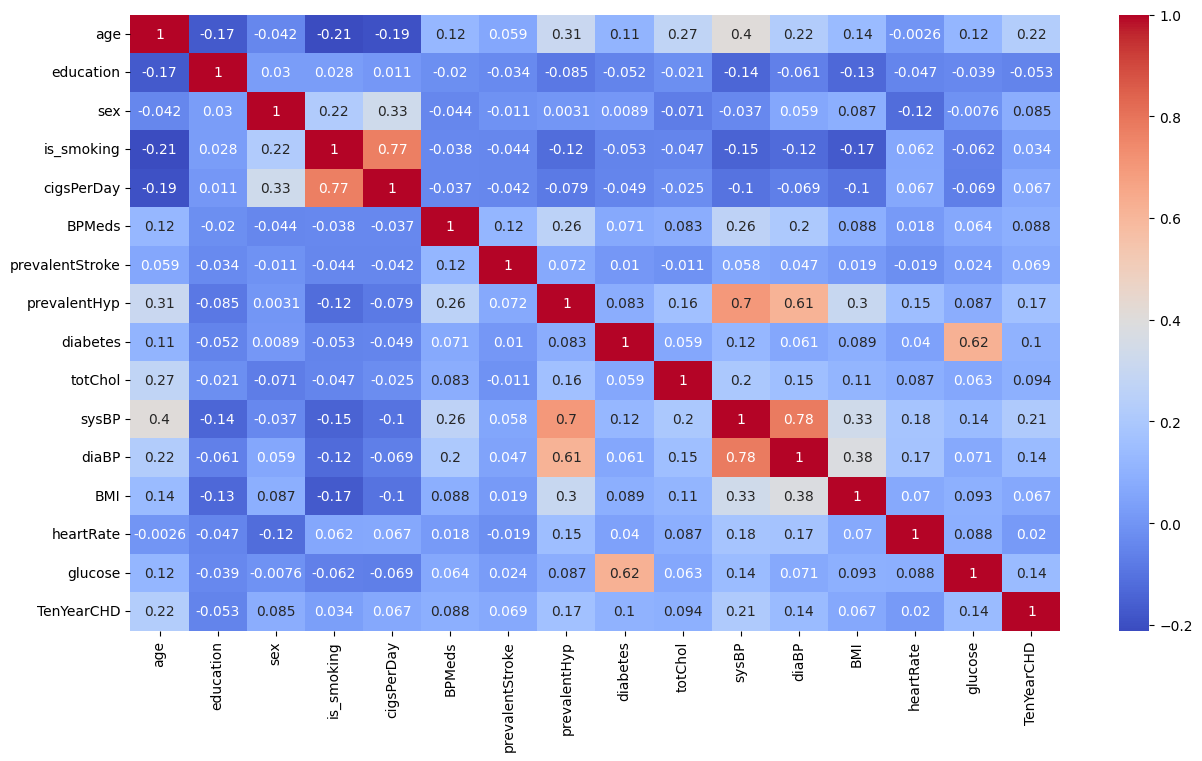

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

The heatmap shows the correlation between each attribute with itself and the others

-----------------
To fill the missing data we used either the Mean, Median, or Mode depending on the variable type
*   Glucose: median
*   Education: mode
*   BPMeds: mode
*   totChol: median
*   cigsPerDay: median
*   BMI: median
*   heartRate: median














In [ ]:
df['glucose']=df['glucose'].fillna(df['glucose'].median())
df['education']=df['education'].fillna(df['education'].mode()[0])
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'is_smoking'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

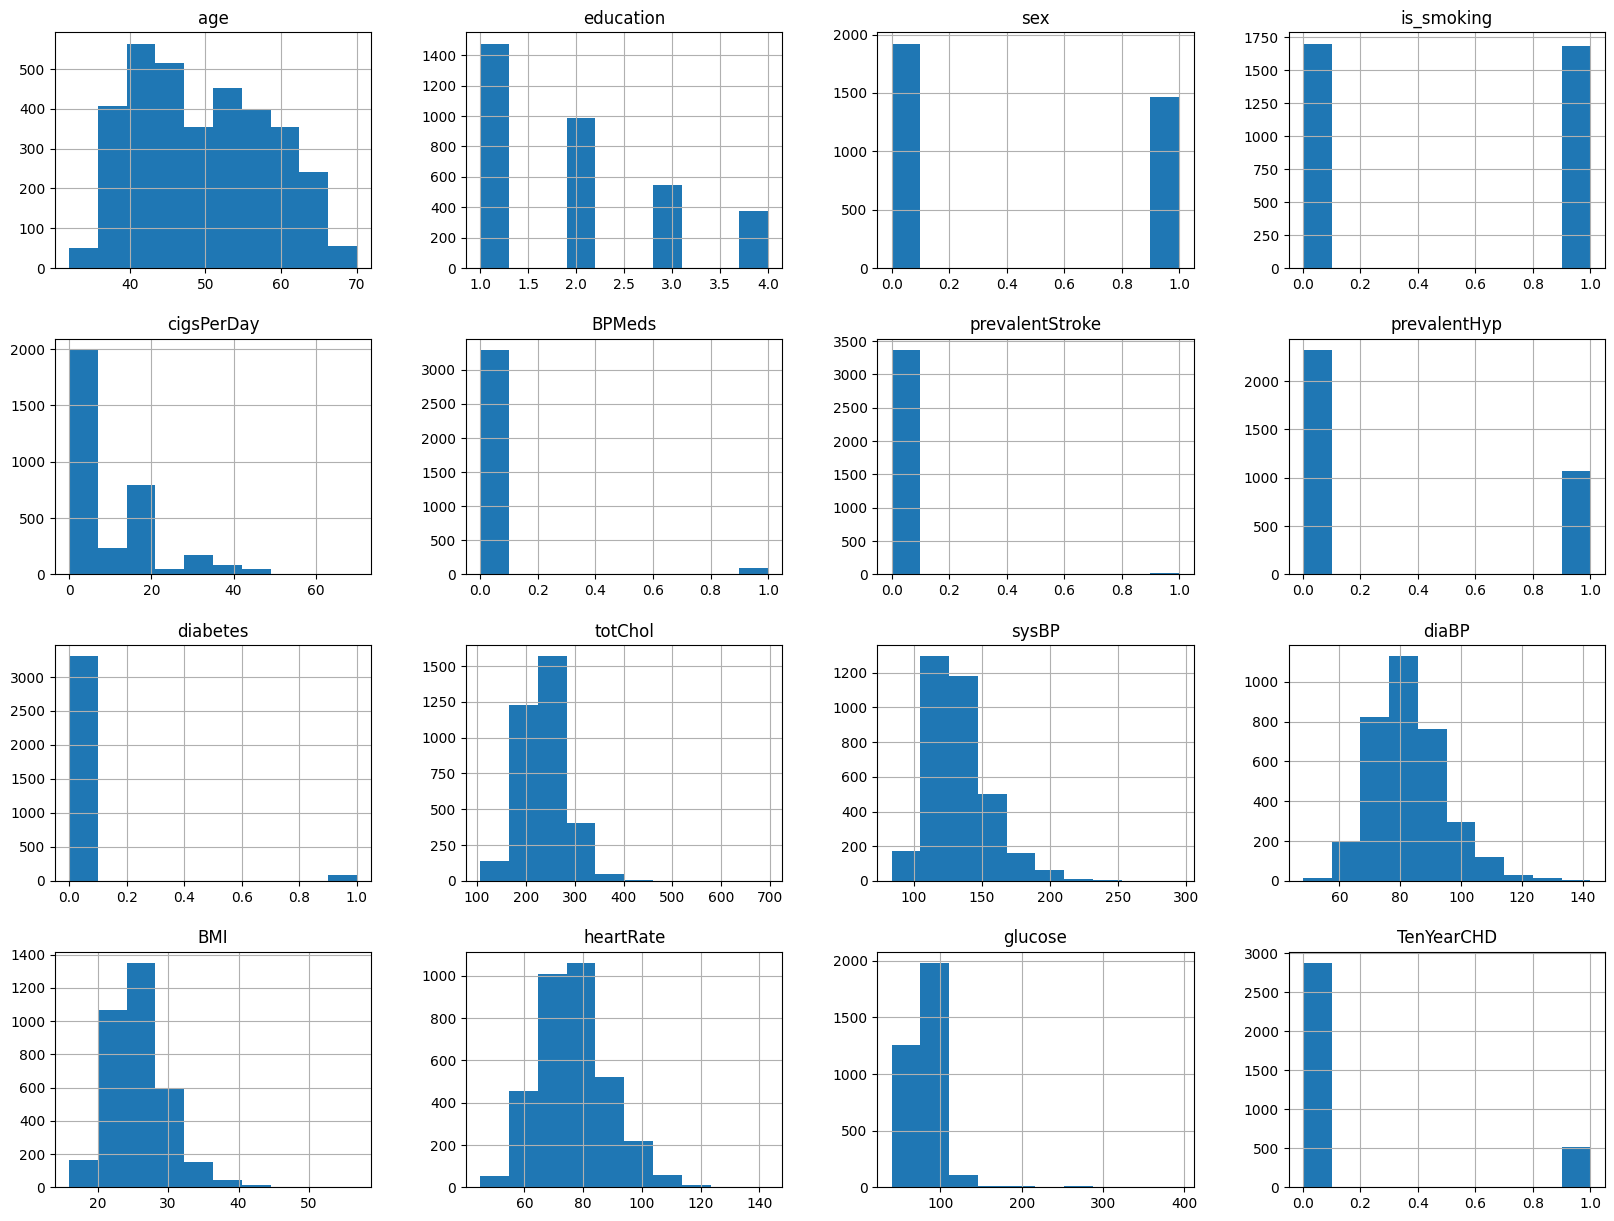

In [ ]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax = ax)

<Axes: >

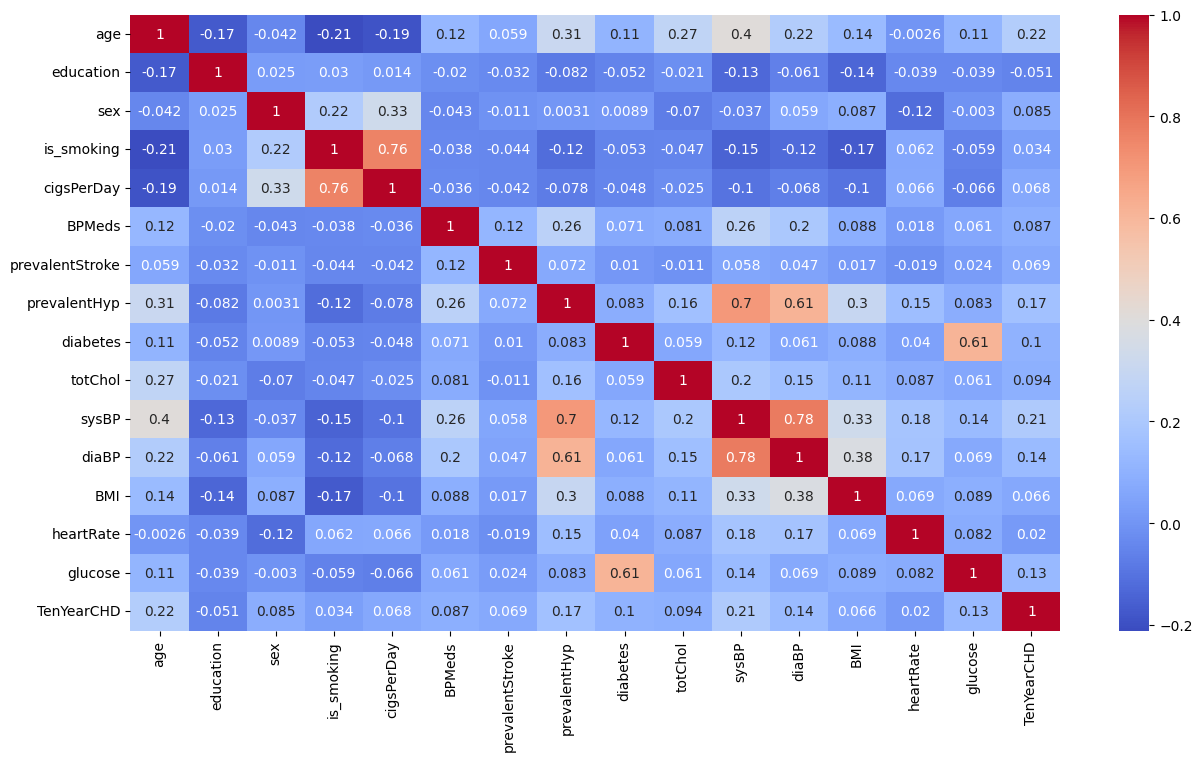

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

Heatmap after filling missing values

---
# Seperating Features and Labels

Plitting the data into features, X, and labels, y.

In [ ]:
X=df[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose']].copy()
y=df['TenYearCHD'].copy()

Since the dataset is imabalnced, under-sampling and over-sampling methods will be applied

Over-sampling method (sm)

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state = 0)
X_sm, y_sm = smote.fit_resample(X, y)

In [ ]:
y_sm=pd.DataFrame(y_sm)
y_sm.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

Under-sampling method (rus)

In [ ]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state = 0)
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
y_rus=pd.DataFrame(y_rus)
y_rus.value_counts()

TenYearCHD
0             511
1             511
dtype: int64


---
Data splitting for over-sampling


In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split( X_sm, y_sm , test_size=0.2, random_state=0) 
print(X_train_sm.shape)
print(X_test_sm.shape)

(4606, 15)
(1152, 15)


In [ ]:
y_train_sm.value_counts()

TenYearCHD
0             2326
1             2280
dtype: int64

In [ ]:
y_test_sm.value_counts()

TenYearCHD
1             599
0             553
dtype: int64

Based on results, the training and testing class are fairly balanced



---
Data splitting for under-sampling


In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split( X_rus, y_rus , test_size=0.2, random_state=0) 
print(X_train_rus.shape)
print(X_test_rus.shape)

(817, 15)
(205, 15)


In [ ]:
y_train_rus.value_counts()

TenYearCHD
0             414
1             403
dtype: int64

In [ ]:
y_test_rus.value_counts()

TenYearCHD
1             108
0              97
dtype: int64

---
# k-NN

k-NN for over-sampling (sm)

Plotting the knn train accuracy and test accuracy to find optimal number of neighbors to use

In [ ]:
neighbors=np.arange(1,15)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sm, y_train_sm)
    # Compute accuracy on the training set and test set
    train_accuracy[i] = knn.score(X_train_sm, y_train_sm)
    test_accuracy[i] = knn.score(X_test_sm, y_test_sm) 

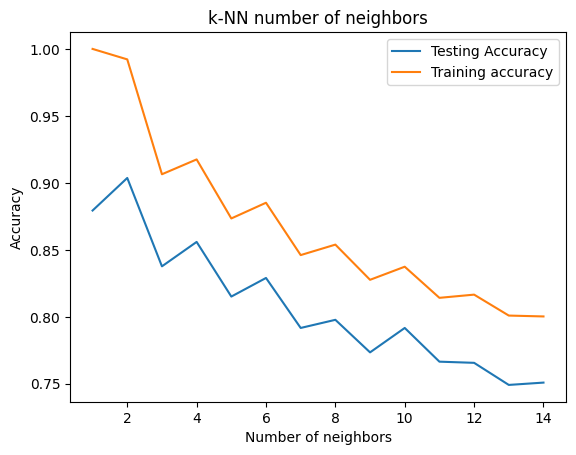

In [ ]:
plt.title('k-NN number of neighbors over')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Based on results, best number of neighbors is k=2 with trainging accuracy of ~0.98 and testing accuracy of ~0.91

In [ ]:
knn_sm = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(X_test_sm,y_test_sm)

0.8914930555555556

Evaluation Metrics for k-NN over sampling

In [ ]:
y_test_pred_knn_sm = knn.predict(X_test_sm)
knn_sm_cm = confusion_matrix(y_test_sm, y_test_pred_knn_sm)

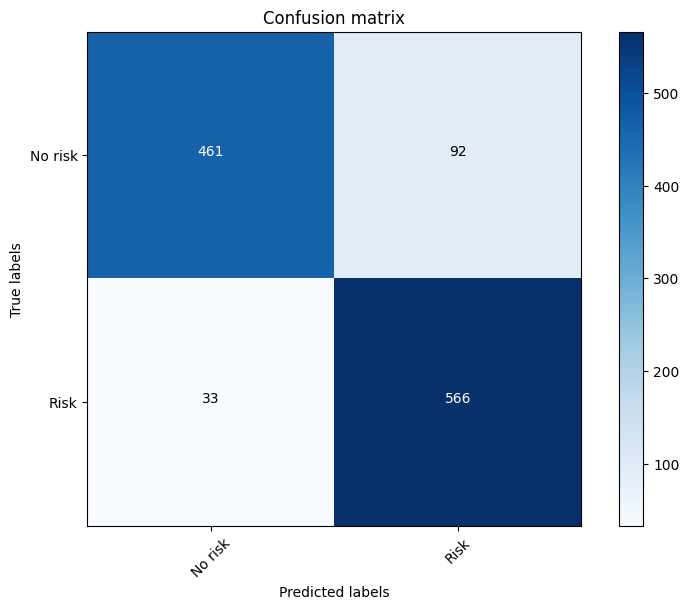

In [ ]:
target_names = ('No risk', 'Risk')
plot_confusion_matrix(knn_sm_cm, target_names)

In [ ]:
print(classification_report(y_test_sm, y_test_pred_knn_sm))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       553
           1       0.86      0.94      0.90       599

    accuracy                           0.89      1152
   macro avg       0.90      0.89      0.89      1152
weighted avg       0.90      0.89      0.89      1152



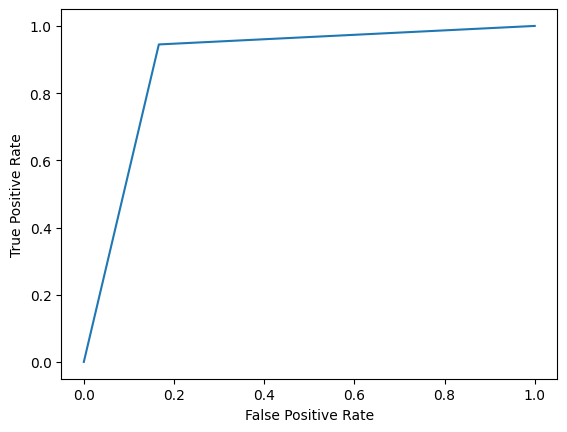

In [ ]:
fpr, tpr, _ = roc_curve(y_test_sm, y_test_pred_knn_sm)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

k-NN for under-sampling (rus)

Plotting the knn train accuracy and test accuracy to find optimal number of neighbors to use

In [ ]:
neighbors=np.arange(1,15)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_rus, y_train_rus)
    # Compute accuracy on the training set and test set
    train_accuracy[i] = knn.score(X_train_rus, y_train_rus)
    test_accuracy[i] = knn.score(X_test_rus, y_test_rus) 

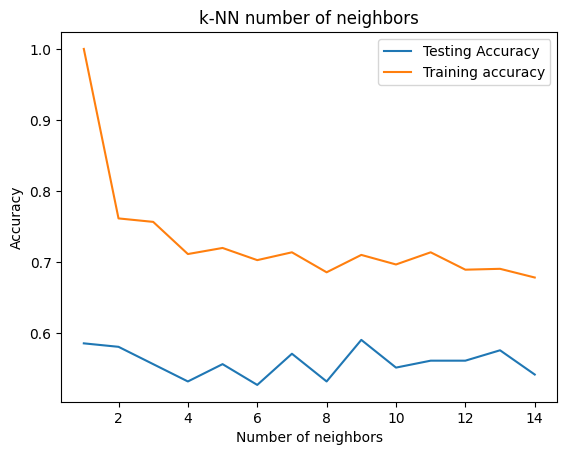

In [ ]:
plt.title('k-NN number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Based on results, best number of neighbors is k=9 with trainging accuracy of ~0.86 and testing accuracy of ~0.61

In [ ]:
knn_rus = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_rus,y_train_rus)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
knn.score(X_test_rus,y_test_rus)

0.5414634146341464

Evaluation Metrics for k-NN over sampling

In [ ]:
y_test_pred_knn_rus = knn.predict(X_test_rus)
knn_rus_cm = confusion_matrix(y_test_rus, y_test_pred_knn_rus)

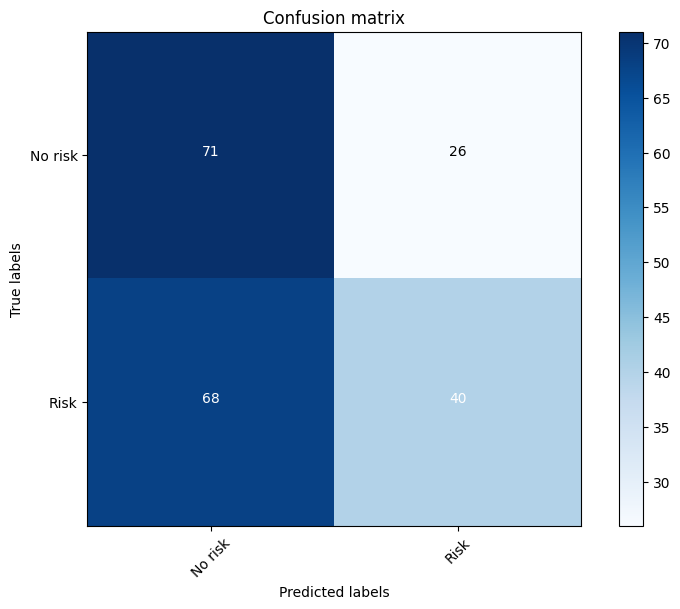

In [ ]:
target_names = ('No risk', 'Risk')
plot_confusion_matrix(knn_rus_cm, target_names)

In [ ]:
print(classification_report(y_test_rus, y_test_pred_knn_rus))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60        97
           1       0.61      0.37      0.46       108

    accuracy                           0.54       205
   macro avg       0.56      0.55      0.53       205
weighted avg       0.56      0.54      0.53       205



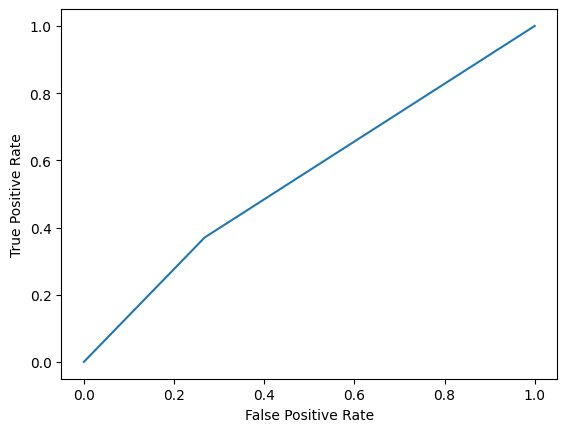

In [ ]:
fpr, tpr, _ = roc_curve(y_test_rus, y_test_pred_knn_rus)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

---
# Decision Tree

dt (sm)

Plot decision tree score for number of maximum feature

In [ ]:
dt_scores_sm = []
for i in range(1, len(X.columns) + 1):
    dt_sm = DecisionTreeClassifier(max_features = i,  random_state = 0)
    dt_sm.fit(X_train_sm, y_train_sm)
    dt_scores_sm.append(round(dt_sm.score(X_test_sm, y_test_sm),2))

Text(0.5, 1.0, 'Decision Tree Classifier Accuracy for Different Number of Maximum Features')

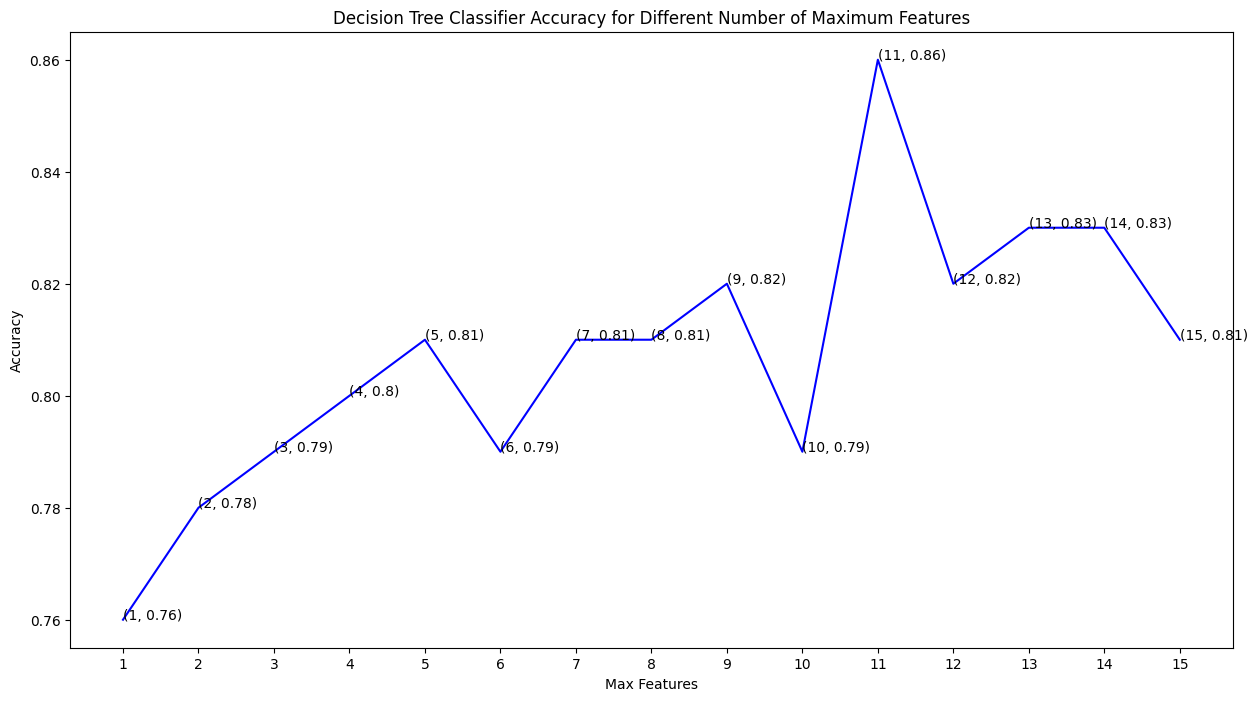

In [ ]:
plt.figure(figsize=(15,8))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores_sm, color = 'blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores_sm[i-1], (i, dt_scores_sm[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy for Different Number of Maximum Features')

Based on results, the max features used will be 11 since it yields highest accuracy of 86% 

In [ ]:
feature = X.columns
importance = dt_sm.feature_importances_
indices = np.argsort(importance)

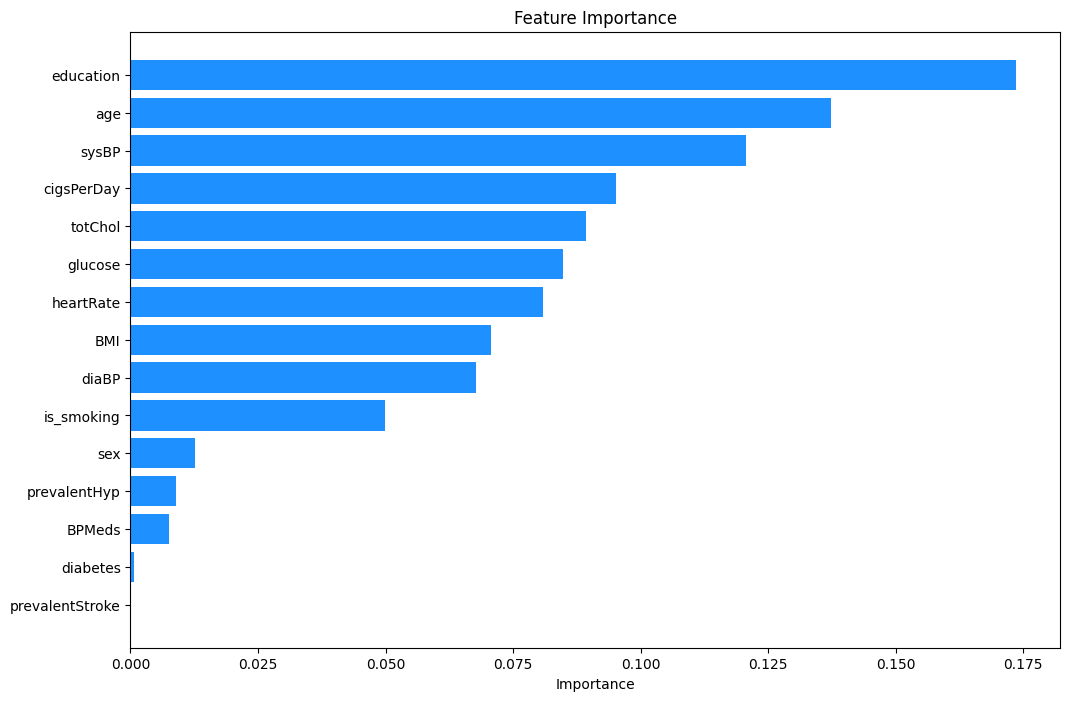

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Importance')
plt.show()

In [ ]:
dt_sm_best = DecisionTreeClassifier(max_features = 11,  random_state = 0)
dt_sm_best.fit(X_train_sm, y_train_sm)
dt_sm_best.score(X_test_sm, y_test_sm)

0.8585069444444444

Evaluation Metrics

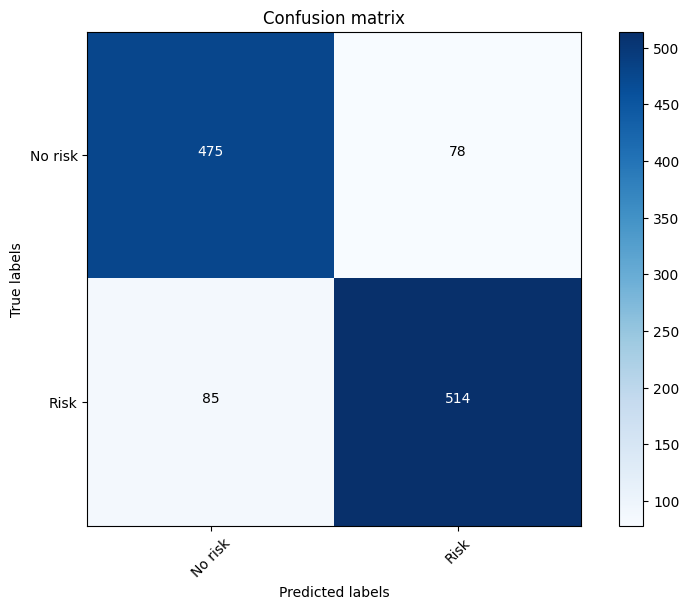

In [ ]:
y_test_pred_dt_sm = dt_sm_best.predict(X_test_sm)
dt_sm_cm = confusion_matrix(y_test_sm, y_test_pred_dt_sm)
target_names = ('No risk', 'Risk')
plot_confusion_matrix(dt_sm_cm, target_names)

In [ ]:
print(classification_report(y_test_sm, y_test_pred_dt_sm))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       553
           1       0.87      0.86      0.86       599

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152



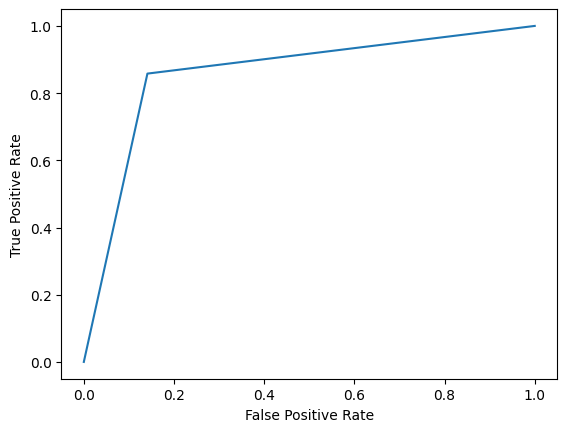

In [ ]:
fpr, tpr, _ = roc_curve(y_test_sm, y_test_pred_dt_sm)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

dt (rus)

Plot decision tree score for number of maximum feature

In [ ]:
dt_scores_rus = []
for i in range(1, len(X.columns) + 1):
    dt_rus = DecisionTreeClassifier(max_features = i,  random_state = 0)
    dt_rus.fit(X_train_rus, y_train_rus)
    dt_scores_rus.append(round(dt_rus.score(X_test_rus, y_test_rus),2))

Text(0.5, 1.0, 'Decision Tree Classifier Accuracy for Different Number of Maximum Features')

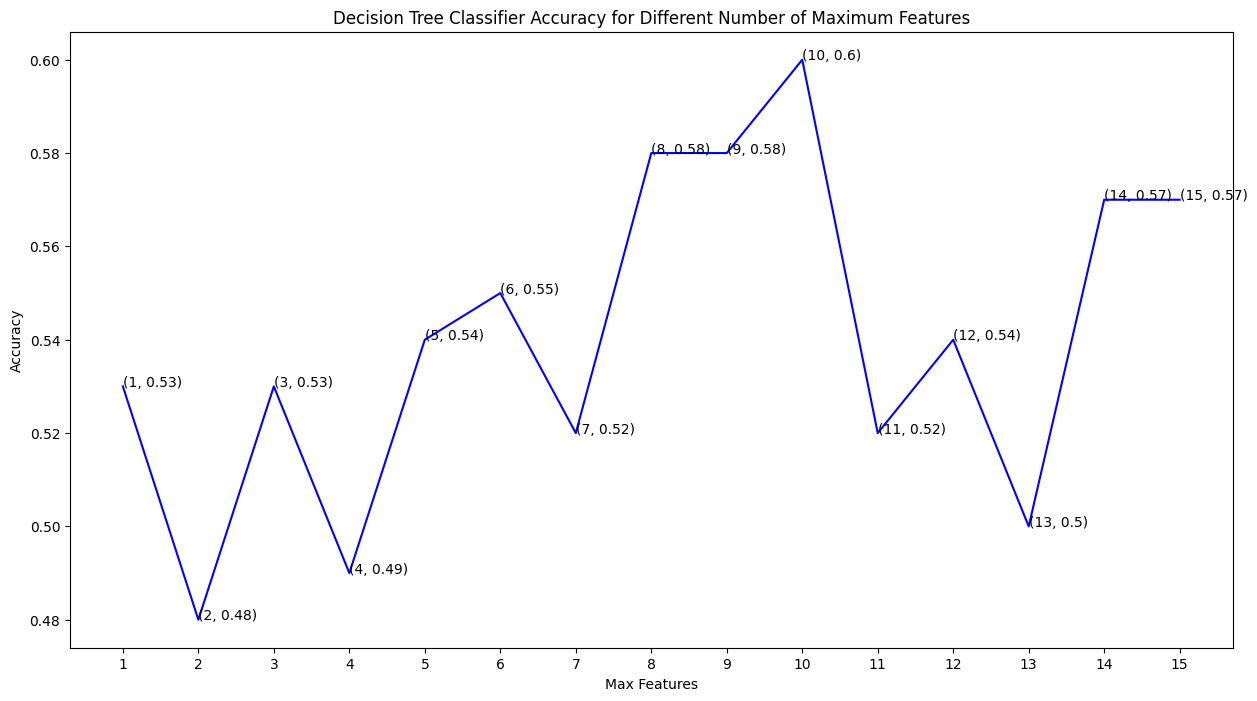

In [ ]:
plt.figure(figsize=(15,8))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores_rus, color = 'blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores_rus[i-1], (i, dt_scores_rus[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy for Different Number of Maximum Features')

Based on results, the max features used will be 10 since it yields 
highest accuracy of 60% 

In [ ]:
feature = X.columns
importance = dt_rus.feature_importances_
indices = np.argsort(importance)

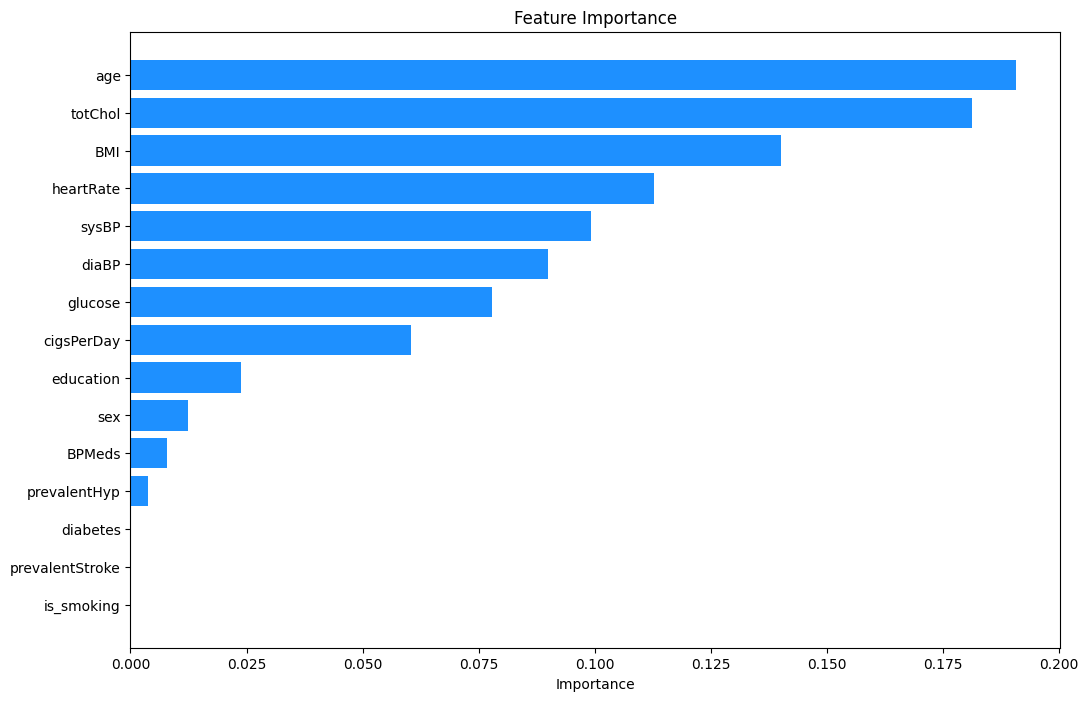

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='dodgerblue', align='center')
plt.yticks(range(len(indices)), [feature[i] for i in indices])
plt.xlabel('Importance')
plt.show()

In [ ]:
dt_rus_best = DecisionTreeClassifier(max_features = 10,  random_state = 0)
dt_rus_best.fit(X_train_rus, y_train_rus)
dt_rus_best.score(X_test_rus, y_test_rus)

0.5707317073170731

Evaluation Metrics

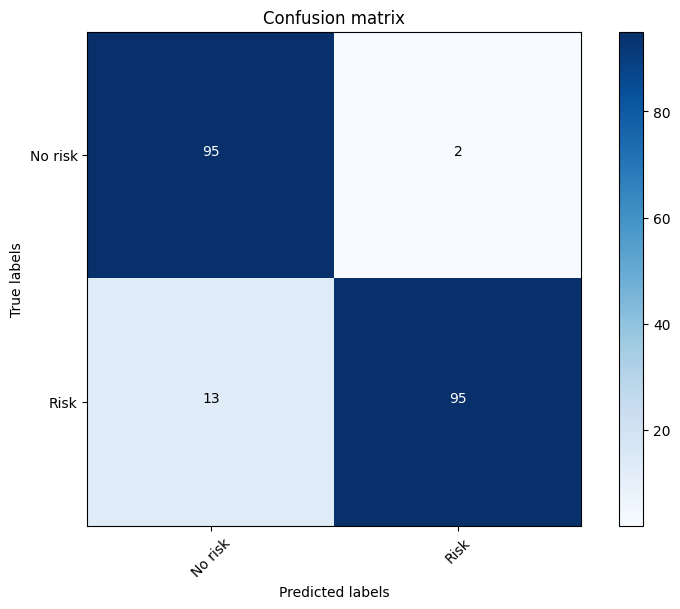

In [ ]:
y_test_pred_dt_rus = dt_sm_best.predict(X_test_rus)
dt_rus_cm = confusion_matrix(y_test_rus, y_test_pred_dt_rus)
target_names = ('No risk', 'Risk')
plot_confusion_matrix(dt_rus_cm, target_names)

In [ ]:
print(classification_report(y_test_rus, y_test_pred_dt_rus))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        97
           1       0.98      0.88      0.93       108

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



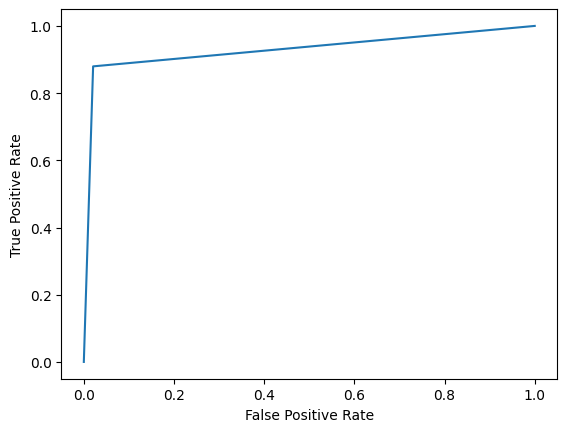

In [ ]:
fpr, tpr, _ = roc_curve(y_test_rus, y_test_pred_dt_rus)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
tree.plot_tree(dt_rus_best)

---
# Naive Bayes

nb (sm)

In [ ]:
nb_sm=GaussianNB()
nb_sm.fit(X_train_sm,y_train_sm)
nb_sm.score(X_train_sm,y_train_sm)

0.6155015197568389

In [ ]:
nb_sm.score(X_test_sm,y_test_sm)

0.5902777777777778

Evaluation Metrics

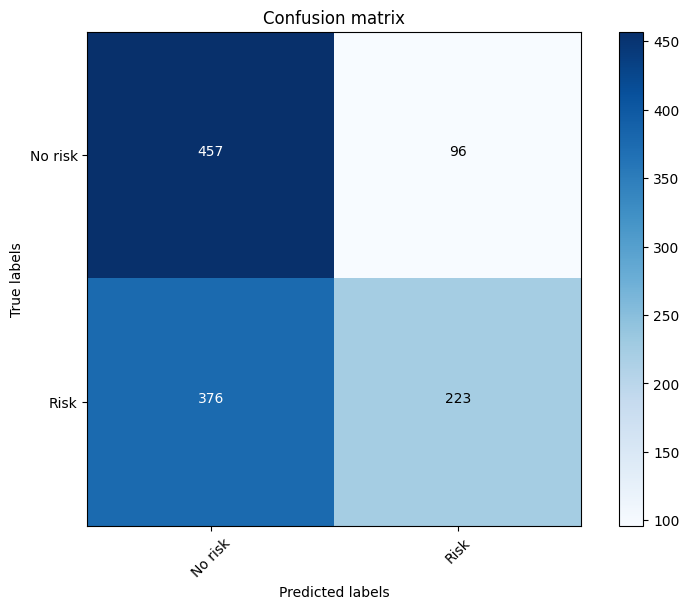

In [ ]:
y_test_pred_nb_sm = nb_sm.predict(X_test_sm)
nb_sm_cm = confusion_matrix(y_test_sm, y_test_pred_nb_sm)
target_names = ('No risk', 'Risk')
plot_confusion_matrix(nb_sm_cm, target_names)

In [ ]:
print(classification_report(y_test_sm, y_test_pred_nb_sm))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66       553
           1       0.70      0.37      0.49       599

    accuracy                           0.59      1152
   macro avg       0.62      0.60      0.57      1152
weighted avg       0.63      0.59      0.57      1152



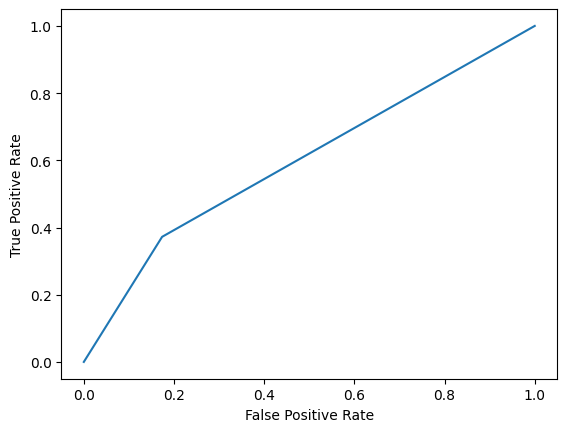

In [ ]:
fpr, tpr, _ = roc_curve(y_test_sm, y_test_pred_nb_sm)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

nb (rus)

In [ ]:
nb_rus=GaussianNB()
nb_rus.fit(X_train_rus,y_train_rus)
nb_rus.score(X_train_rus,y_train_rus)

0.6034271725826194

In [ ]:
nb_rus.score(X_test_rus,y_test_rus)

0.551219512195122

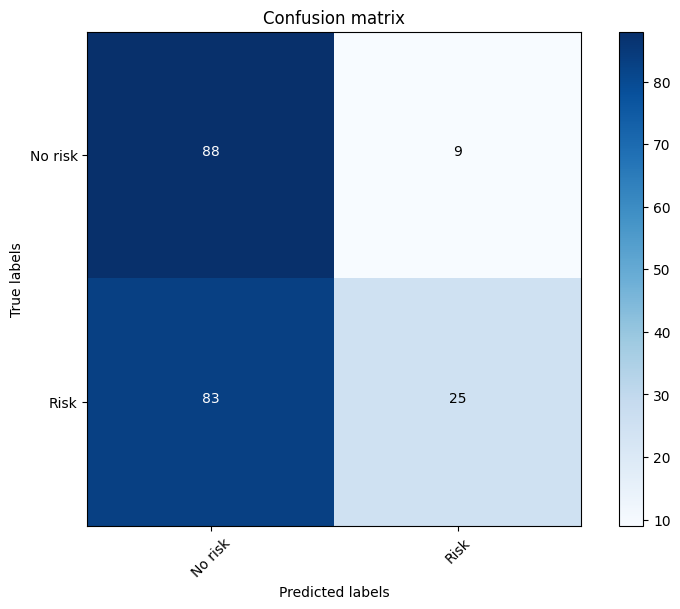

In [ ]:
y_test_pred_nb_rus = nb_rus.predict(X_test_rus)
nb_rus_cm = confusion_matrix(y_test_rus, y_test_pred_nb_rus)
target_names = ('No risk', 'Risk')
plot_confusion_matrix(nb_rus_cm, target_names)

In [ ]:
print(classification_report(y_test_rus, y_test_pred_nb_rus))

              precision    recall  f1-score   support

           0       0.51      0.91      0.66        97
           1       0.74      0.23      0.35       108

    accuracy                           0.55       205
   macro avg       0.62      0.57      0.50       205
weighted avg       0.63      0.55      0.50       205



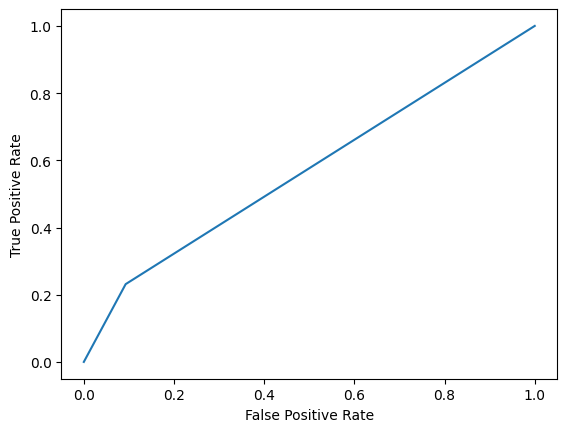

In [ ]:
fpr, tpr, _ = roc_curve(y_test_rus, y_test_pred_nb_rus)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

---
# SVM

svm (sm)

Plot accuracy vs kernel bargraph to know which will yeild higher accuracy

In [ ]:
svc_scores_sm = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train_sm, y_train_sm)
    svc_scores_sm.append(round(svc_classifier.score(X_test_sm, y_test_sm),2))

Text(0.5, 1.0, 'Support Vector Classifier Accuracy for Different Kernels')

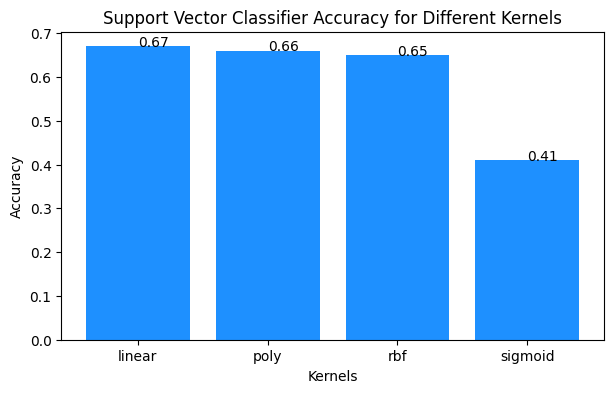

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores_sm,color='dodgerblue')
for i in range(len(kernels)):
    plt.text(i, svc_scores_sm[i], svc_scores_sm[i])
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('Support Vector Classifier Accuracy for Different Kernels')

Based on results, kernel = 'linear' has best accuracy of 67%

In [ ]:
svm_sm=SVC(kernel='linear')
svm_sm.fit(X_train_sm,y_train_sm)
svm_sm.score(X_test_sm, y_test_sm)

0.6736111111111112

Evaluation Metrics

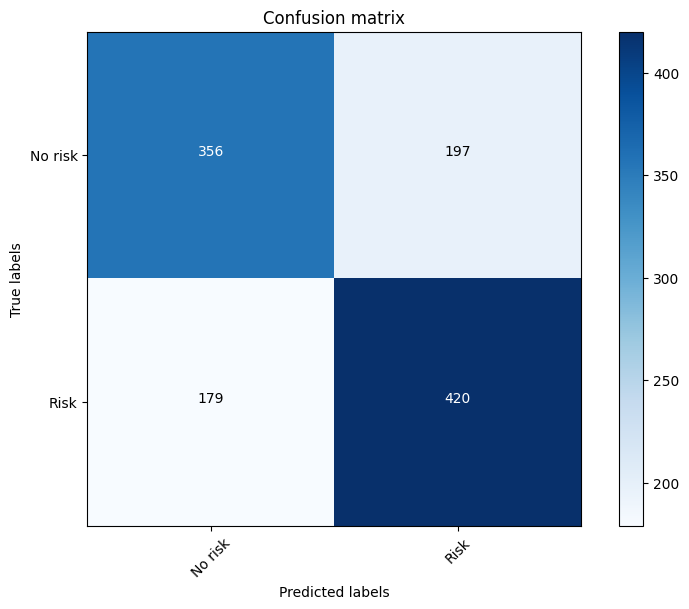

In [ ]:
y_test_pred_svm_sm=svm_sm.predict(X_test_sm)
svm_sm_cm = confusion_matrix(y_test_sm, y_test_pred_svm_sm)
target_names = ('No risk', 'Risk')
plot_confusion_matrix(svm_sm_cm, target_names)

In [ ]:
print(classification_report(y_test_sm, y_test_pred_svm_sm))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       553
           1       0.68      0.70      0.69       599

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



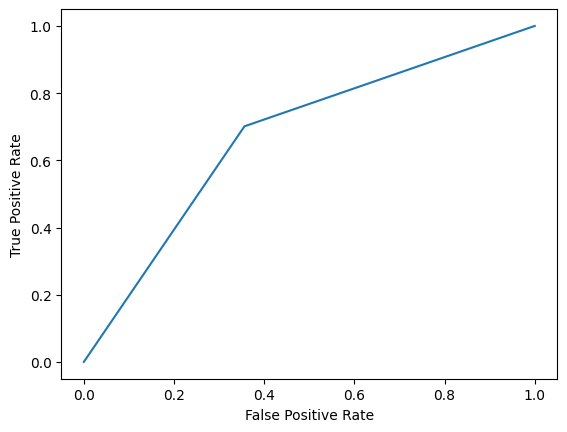

In [ ]:
fpr, tpr, _ = roc_curve(y_test_sm, y_test_pred_svm_sm)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

---
svm (rus)

Plot accuracy vs kernel bargraph to know which will yeild higher accuracy

In [ ]:
svc_scores_rus = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train_rus, y_train_rus)
    svc_scores_rus.append(round(svc_classifier.score(X_test_rus, y_test_rus),2))

Text(0.5, 1.0, 'Support Vector Classifier Accuracy for Different Kernels')

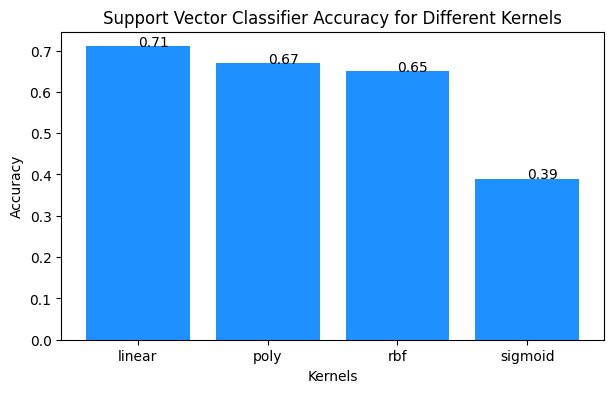

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores_rus,color='dodgerblue')
for i in range(len(kernels)):
    plt.text(i, svc_scores_rus[i], svc_scores_rus[i])
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('Support Vector Classifier Accuracy for Different Kernels')

Based on results, kernel = 'linear' has best accuracy of 71%

In [ ]:
svm_rus=SVC(kernel='linear')
svm_rus.fit(X_train_rus,y_train_rus)
svm_rus.score(X_test_rus, y_test_rus)

0.7073170731707317

Evaluation Metrics

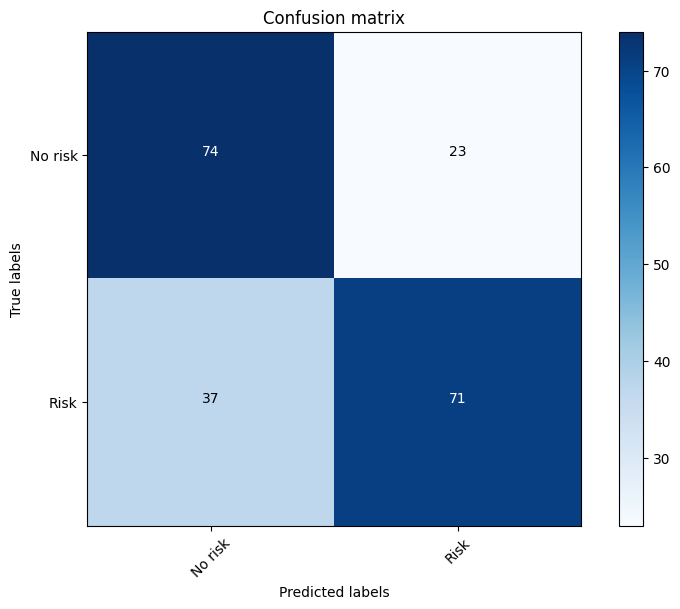

In [ ]:
y_test_pred_svm_rus=svm_rus.predict(X_test_rus)
svm_rus_cm = confusion_matrix(y_test_rus, y_test_pred_svm_rus)
target_names = ('No risk', 'Risk')
plot_confusion_matrix(svm_rus_cm, target_names)

In [ ]:
print(classification_report(y_test_rus, y_test_pred_svm_rus))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        97
           1       0.76      0.66      0.70       108

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.71       205
weighted avg       0.71      0.71      0.71       205



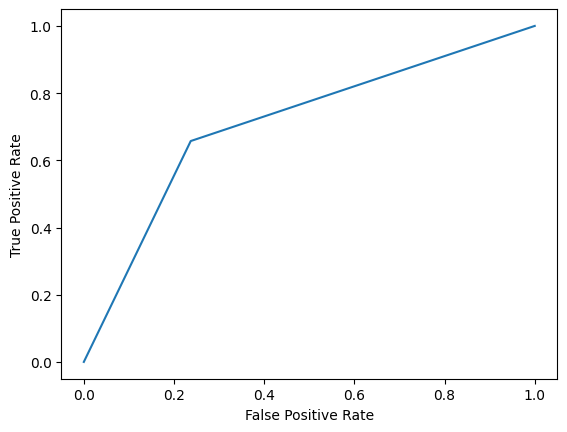

In [ ]:
fpr, tpr, _ = roc_curve(y_test_rus, y_test_pred_svm_rus)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()